In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score 
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.compose import TransformedTargetRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve

In [2]:
Data=pd.read_csv('1000_y_data.csv')
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib10 = Data.columns[35]
col = Data.columns
cv = KFold(n_splits=10)
X = Data[features]
y = Data[Rib10]

# Random Hyperparameter Grid

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# N estimators

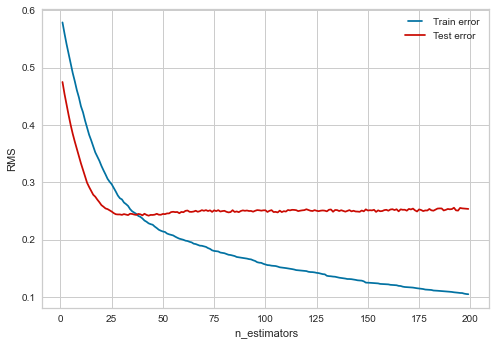

In [6]:
n_estimators = np.arange(1,200,1)
train_results = []
test_results = []
for eta in n_estimators:
    model = GradientBoostingRegressor(n_estimators=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' n_estimators')
plt.show()

# Learning rate

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

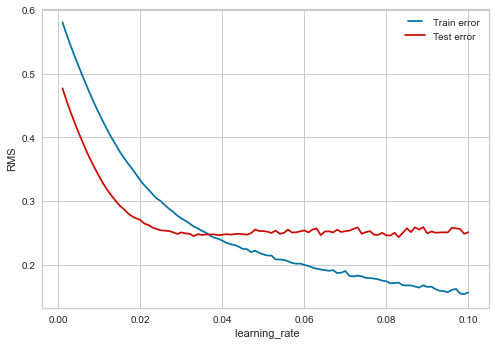

In [15]:
learning_rates = np.linspace(0.001,0.1,100)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' learning_rate')
plt.show()

# Max_depth

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

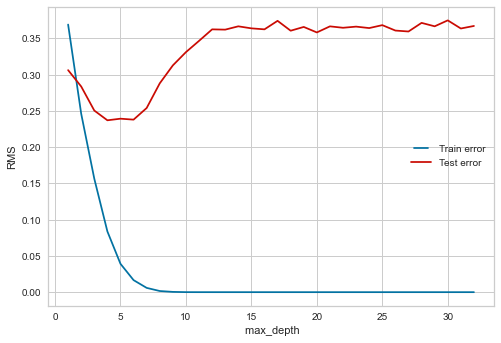

In [17]:
learning_rates = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(max_depth=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' max_depth')
plt.show()

# min_samples_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

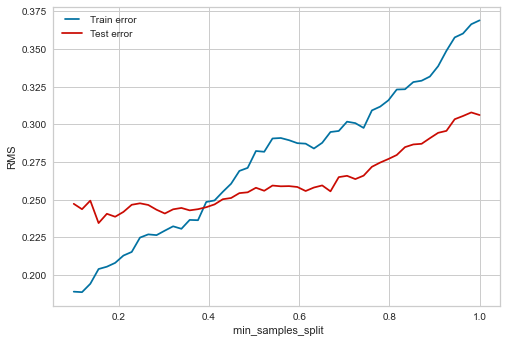

In [19]:
learning_rates = np.linspace(0.1, 1.0, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(min_samples_split=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' min_samples_split')
plt.show()

## min_samples_leaf

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

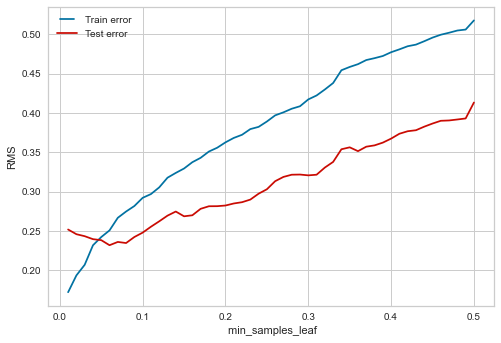

In [23]:
learning_rates = np.linspace(0.01, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(min_samples_leaf=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' min_samples_leaf')
plt.show()

# max features

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

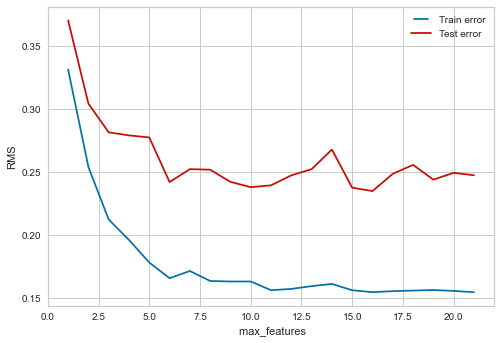

In [27]:
learning_rates = list(range(1,x_train.shape[1]))
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(max_features=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' max_features')
plt.show()

## Randomized search 

In [3]:
X=Data[features]
y=Data[Rib4]

In [3]:
#Rib10
n_estimators = [5,10,15,20,30,40]
max_features = ['auto','sqrt',0.5]
max_depth = [2,5,10,15,20,25,30]
min_samples_split = [0.02,0.03,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.09,0.1,0.15]
min_samples_leaf = [0.01,0.02,0.03,0.05,0.06]
criterion=['mse','mae']
warm_start=[True,False]
learning_rate = [0.01,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075]
subsample = [0.5,1.0]

random_grid = {"learning_rate"   : learning_rate,
             "subsample"        : subsample,
             "n_estimators": n_estimators,
             'max_depth'        : max_depth,
            "criterion": criterion,
            "warm_start":warm_start,
             "max_features"     : max_features,
             "min_samples_split": min_samples_split,
             "min_samples_leaf" : min_samples_leaf
             }

In [4]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
y_t=np.log(y)
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=12, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'learning_rate': [0.01, 0.02, 0.025,
                                                          0.03, 0.035, 0.04,
                                                          0.045, 0.05, 0.055,
                                                          0.06, 0.065, 0.07,
                                                          0.075],
                                        'max_depth': [2, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt', 0.5],
                                        'min_samples_leaf': [0.01, 0.02, 0.03,
                                                             0.05, 0.06],
                                        'min_samples_split': [0.02, 0.03, 0.04,
                                                        

In [5]:
rf_random.best_params_

{'warm_start': True,
 'subsample': 1.0,
 'n_estimators': 40,
 'min_samples_split': 0.05,
 'min_samples_leaf': 0.06,
 'max_features': 'auto',
 'max_depth': 25,
 'learning_rate': 0.065,
 'criterion': 'mse'}

In [6]:
# Rib10
X=Data[features]
y=Data[Rib10]
mode=GradientBoostingRegressor(subsample=1.0,n_estimators=40,min_samples_split=0.05,min_samples_leaf=0.06,max_features='auto',max_depth=25,learning_rate=0.065,criterion= 'mse',warm_start=True)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

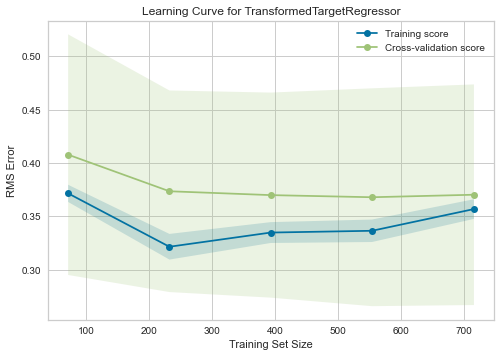

In [7]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [8]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.451516

Root Mean squared error: 0.375469

Root Mean squared error: 0.282671

Root Mean squared error: 0.440414

Root Mean squared error: 0.513035

Root Mean squared error: 0.154786

Root Mean squared error: 0.276042

Root Mean squared error: 0.351472

Root Mean squared error: 0.384811

Root Mean squared error: 0.471948

error COV--->0    2.526675
dtype: float64  error mean --->0    0.149653
Name: mean, dtype: float64  error std --->0    0.378125
Name: std, dtype: float64


In [9]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.617791
dtype: float64  error mean --->0    0.129005
Name: mean, dtype: float64  error std --->0    0.337708
Name: std, dtype: float64


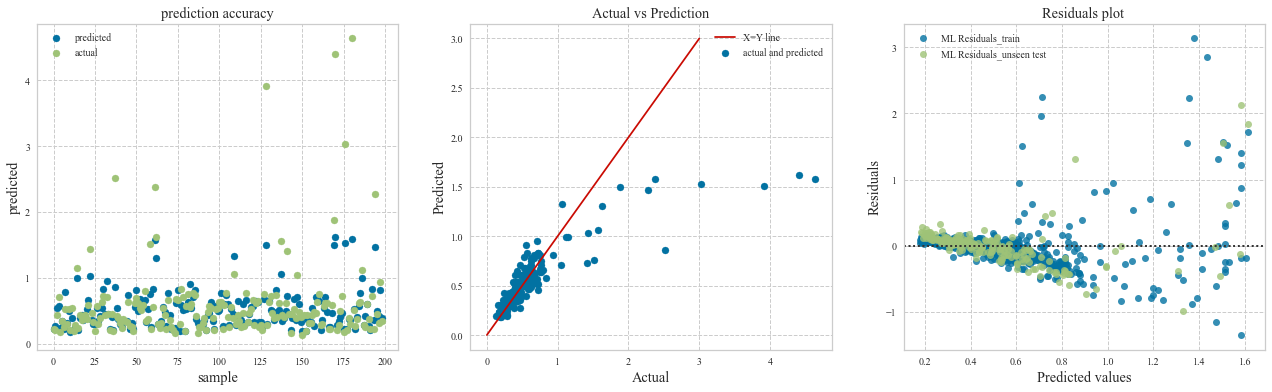

In [11]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

# Grid search

In [38]:
# # Hyperparameter values of GradientBoost to input to the GridSearchCV

n_estimators = [35,40,42,45]
max_features = ['auto','sqrt',0.5]
max_depth = [23,25,28,30,32]
min_samples_split = [0.01,0.02]
min_samples_leaf = [0.085,0.09,0.1,0.12]
criterion=['mse','mae']
warm_start=[True,False]
learning_rate = [0.054,0.055,0.06,0.061,0.062]
subsample = [0.5,1.0]

random_grid = {"learning_rate"   : learning_rate,
             "subsample"        : subsample,
             "n_estimators": n_estimators,
             'max_depth'        : max_depth,
            "criterion": criterion,
            "warm_start":warm_start,
             "max_features"     : max_features,
             "min_samples_split": min_samples_split,
             "min_samples_leaf" : min_samples_leaf
             }

In [39]:
Data=pd.read_csv('1000_y_data.csv')
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib1 = Data.columns[26]
col = Data.columns
cv = KFold(n_splits=10)
X = Data[features]
y = Data[Rib1]

In [ ]:
# First create the base model to tune
y_t=np.log(y)
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 19200 candidates, totalling 192000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 4656 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 5498 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 7036 tasks      | elapsed:  3.0min


In [110]:
reg.best_params_

{'criterion': 'mae',
 'learning_rate': 0.03,
 'max_depth': 30,
 'max_features': 0.5,
 'min_samples_leaf': 0.06,
 'min_samples_split': 0.02,
 'n_estimators': 120,
 'subsample': 1.0,
 'warm_start': False}

In [111]:
## Rib1
mode=GradientBoostingRegressor(max_depth=30, min_samples_leaf=0.06, min_samples_split=0.02,criterion='mae',max_features=0.5,
                      n_estimators=120,learning_rate=0.03, warm_start=False)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

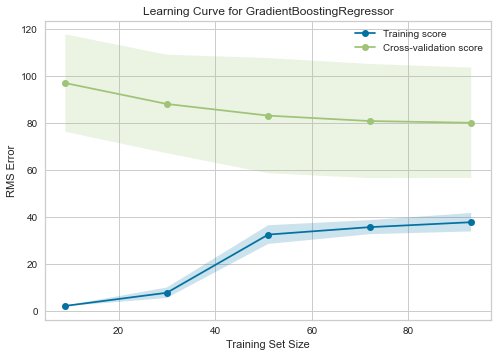

In [112]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data set

In [113]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 82.393784

Root Mean squared error: 60.650460

Root Mean squared error: 99.328571

Root Mean squared error: 120.992783

Root Mean squared error: 80.688867

Root Mean squared error: 53.545831

Root Mean squared error: 103.709320

Root Mean squared error: 46.071974

Root Mean squared error: 67.464414

Root Mean squared error: 87.594924

error COV--->0    0.994978
dtype: float64  error mean --->0    65.461808
Name: mean, dtype: float64  error std --->0    65.133092
Name: std, dtype: float64


## Training set

In [114]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.586574
dtype: float64  error mean --->0    25.097101
Name: mean, dtype: float64  error std --->0    39.818402
Name: std, dtype: float64


In [35]:
# define model evaluation method
cv = KFold(n_splits=10,random_state=1)
# evaluate model
scores = cross_val_score(mod, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 0.137 (0.043)
